#Transfer Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''Importación de librerías necesarias para la ejecución'''
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
'''Lectura de la ruta del dataset'''
fpath = './Granadilla_Aument'
random_seed = 10

'''Lectura de categorías existentes del dataset'''

categories = 'Granadilla', 'Granadilla_N'
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ('Granadilla', 'Granadilla_N') 

No. of categories =  2


In [ ]:
'''Carga de imágenes sobre sus clases existentes'''
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  367 
No. of labels loaded =  367
<class 'list'> <class 'list'>


In [ ]:
'''Conteo de totalidad de imágenes y sus dimensiones'''
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (367, 100, 100, 3) 
Labels shape =  (367,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


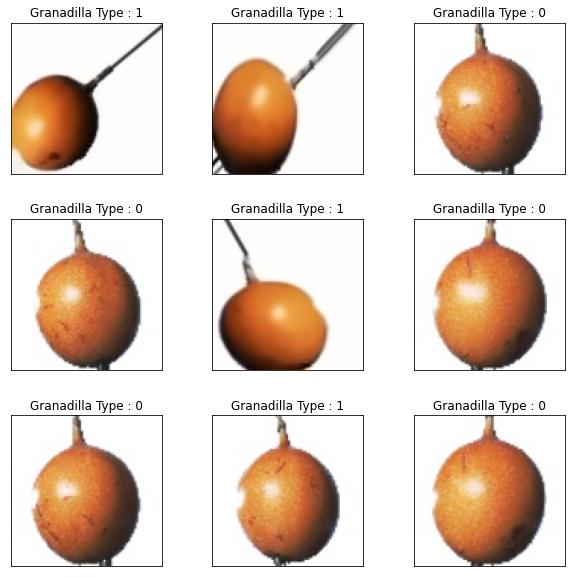

In [ ]:
'''Toma randómica de imágenes del dataset correspondientes a 
   cada tipo de granadilla'''
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (10 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Granadilla Type : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [ ]:
'''Mezcla de los elementos correspondientes a las imágenes'''
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [ ]:
'''Mezcla de elementos de las imágenes basándose en las etiquetas'''
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (367, 100, 100, 3) 
Labels shape after shuffling =  (367,)


In [ ]:
'''Conteo de imágenes normalizadas'''
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (367, 100, 100, 3)


In [ ]:
'''División de los trenes de entrenamiento y testeo'''
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (293, 100, 100, 3)
train_labels shape =  (293,)

test_ds shape =  (74, 100, 100, 3)
test_labels shape =  (74,)


#CNN MODEL

In [ ]:
'''Cargado del modelo VGG19 de TL'''
base_model = VGG19(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights
'''Ingreso de los datos dentro del modelo'''
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
'''Definición de los hiperparámetros y capas neuronales'''
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

# Entrenamiento

In [ ]:
'''Compilación y cálculo de acurracy del modelo'''
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
8/8 [==============================] - 1s 105ms/step - loss: 0.5500 - accuracy: 0.7436 - val_loss: 0.4367 - val_accuracy: 0.8475
Epoch 2/50
8/8 [==============================] - 0s 56ms/step - loss: 0.4751 - accuracy: 0.8120 - val_loss: 0.4350 - val_accuracy: 0.8136
Epoch 3/50
8/8 [==============================] - 0s 56ms/step - loss: 0.4662 - accuracy: 0.7863 - val_loss: 0.4599 - val_accuracy: 0.8475
Epoch 4/50
8/8 [==============================] - 0s 56ms/step - loss: 0.4803 - accuracy: 0.7821 - val_loss: 0.4240 - val_accuracy: 0.8475
Epoch 5/50
8/8 [==============================] - 0s 56ms/step - loss: 0.4471 - accuracy: 0.7949 - val_loss: 0.4046 - val_accuracy: 0.8305
Epoch 6/50
8/8 [==============================] - 0s 56ms/step - loss: 0.4855 - accuracy: 0.7949 - val_loss: 0.4060 - val_accuracy: 0.8305
Epoch 7/50
8/8 [==============================] - 0s 56ms/step - loss: 0.4812 - accuracy: 0.7778 - val_loss: 0.4816 - val_accuracy: 0.8644
Epoch 8/50
8/8 [==========